# Generate basic applicant compositions

1. Preparation

In [1]:
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt
import json

In [2]:
path=Path()
parent_path=str(path.parent.absolute())[:-10]

In [3]:
removed_csv=parent_path+"/data/csvs/hmda_2017_ca_noname.csv"

In [4]:
numerics = ['loan_amount_000s', 'applicant_income_000s', 'population', 'minority_population',
            'hud_median_family_income', 'tract_to_msamd_income', 'number_of_owner_occupied_units',
            'number_of_1_to_4_family_units', 'application_date_indicator', 'rate_spread']
dtypes={}
for num in numerics:
        dtypes[num] = 'float64'

In [5]:
skimmed_df=pd.read_csv(removed_csv, low_memory=False, dtype=dtypes, na_values=' ')

In [6]:
js_road=parent_path+"/src/data_processing/code_map.json"

In [7]:
with open(js_road, 'r') as fh:
    code_map=json.load(fh)
    for i in code_map.keys():
        code_map[i]={int(m):n for m, n in code_map[i].items()}

In [8]:
skimmed_df.columns

Index(['as_of_year', 'respondent_id', 'agency_abbr', 'agency_code',
       'loan_type', 'property_type', 'loan_purpose', 'owner_occupancy',
       'loan_amount_000s', 'preapproval', 'action_taken', 'msamd',
       'state_abbr', 'state_code', 'county_code', 'census_tract_number',
       'applicant_ethnicity', 'co_applicant_ethnicity', 'applicant_race_1',
       'applicant_race_2', 'applicant_race_3', 'applicant_race_4',
       'applicant_race_5', 'co_applicant_race_1', 'co_applicant_race_2',
       'co_applicant_race_3', 'co_applicant_race_4', 'co_applicant_race_5',
       'applicant_sex', 'co_applicant_sex', 'applicant_income_000s',
       'purchaser_type', 'denial_reason_1', 'denial_reason_2',
       'denial_reason_3', 'rate_spread', 'hoepa_status', 'lien_status',
       'edit_status', 'sequence_number', 'population', 'minority_population',
       'hud_median_family_income', 'tract_to_msamd_income',
       'number_of_owner_occupied_units', 'number_of_1_to_4_family_units',
       'appl

In [9]:
code_map.keys()

dict_keys(['agency', 'loan_type', 'property_type', 'loan_purpose', 'owner_occupancy', 'preapproval', 'action_taken', 'ethnicity', 'race', 'sex', 'purchaser_type', 'denial_reason', 'hoepa_status', 'lien_status', 'edit_status', 'county'])

In [10]:
image_path=parent_path+'/result/eda/'
if not os.path.exists(image_path):
    os.makedirs(image_path)

2. Gender analysis

a.) All applicant

In [11]:
genderMap=code_map['sex'].copy()
genderMap[3]='Unknown'
genderMap[4]='Unknown'

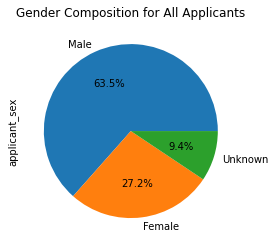

In [12]:
Sex_total=skimmed_df['applicant_sex'].replace(genderMap).value_counts()
plt.figure()
Sex_total.plot.pie(legend=False, title='Gender Composition for All Applicants',autopct='%1.1f%%')
plt.savefig(image_path+'Total_applicant_gender.png', bbox_inches='tight')


In [13]:
actionM=code_map['action_taken']

<Figure size 432x288 with 0 Axes>

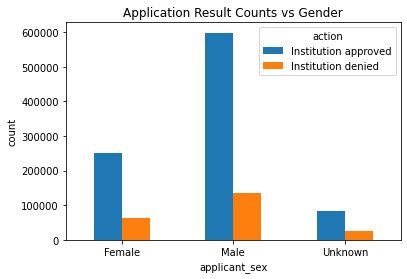

In [14]:
Sex_result=skimmed_df[['applicant_sex','action_taken']]
RecodeAction={1:"Institution approved",2:"Institution approved", 3:'Institution denied', 7:'Institution denied',8:'Institution approved'}
Sex_result_b=pd.DataFrame()
Sex_result_b['action']= Sex_result['action_taken'].replace(RecodeAction)
Sex_result_b['applicant_sex']=Sex_result['applicant_sex'].replace(genderMap)
Sex_result_a1=Sex_result_b.pivot_table(index='applicant_sex', columns='action',aggfunc='size',fill_value=0)
plt.figure()
Sex_result_a1.plot.bar(title='Application Result Counts vs Gender')
plt.ylabel('count')
plt.xticks(rotation=360)
plt.savefig(image_path+'Application_result_count_gender.png', bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

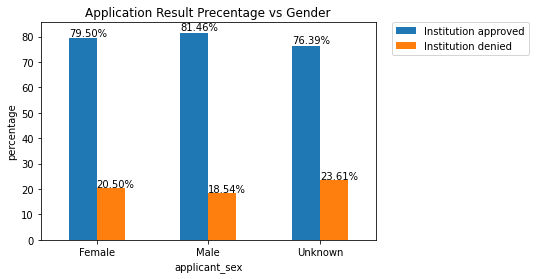

In [15]:
totalSA1=Sex_result_a1.sum(axis=1)
Sex_result_a2=Sex_result_a1.T
temp=Sex_result_a2/totalSA1.values
Sex_result_a2=temp.T*100
plt.figure()
SA2B=Sex_result_a2.plot.bar(title='Application Result Precentage vs Gender')
for p in SA2B.patches:
    SA2B.annotate(str("%.2f"%p.get_height())+'%', xy=(p.get_x(), p.get_height()*1.01))
plt.xticks(rotation=360)
plt.ylabel('percentage')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig(image_path+'Application_result_percentage_gender.png', bbox_inches='tight')

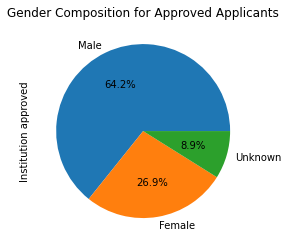

In [18]:
Sex_result_approve=Sex_result_a1['Institution approved'].reindex(index=['Male','Female','Unknown'])
plt.figure()
Sex_result_approve.plot.pie(legend=False, title='Gender Composition for Approved Applicants',autopct='%1.1f%%')
plt.savefig(image_path+'Approved_applicant_gender.png', bbox_inches='tight')

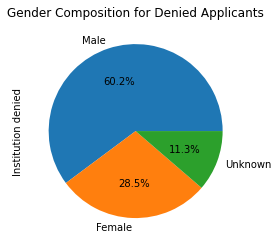

In [19]:
Sex_result_denied=Sex_result_a1['Institution denied'].reindex(index=['Male','Female','Unknown'])
plt.figure()
Sex_result_denied.plot.pie(legend=False, title='Gender Composition for Denied Applicants',autopct='%1.1f%%')
plt.savefig(image_path+'Denied_applicant_gender.png', bbox_inches='tight')

b. co-applicant vs no co-applicant

In [20]:
skimmed_df['co_applicant_sex'].value_counts()

5    594473
2    403029
1    105659
3     52826
4      1708
Name: co_applicant_sex, dtype: int64

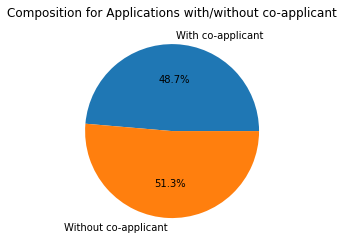

In [46]:
plt.figure()
plt.pie([len(Coappli),len(Nonco)],labels=['With co-applicant', 'Without co-applicant'],autopct='%1.1f%%')
plt.title('Composition for Applications with/without co-applicant')
plt.savefig(image_path+'Composition_for_Applications_with_or_without_co-applicant.png',bbox_inches='tight')

In [61]:
def pie_helper(value_counter,image_path,out_path,title):
        """
        a helper function for generating pie chart

        :param value_counter: value_counts dataframe
        :param image_path: out put image path
        :param out_path: out put image file name+.png
        :param title: picture title
        """
        df=value_counter.reindex(index=['Male','Female','Unknown'])
        plt.figure()
        df.plot.pie(legend=False, title=title,autopct='%1.1f%%')
        plt.savefig(image_path+out_path, bbox_inches='tight')
  
        return
    


In [64]:
def bar_helper(df,image_path,out_path,title,genderM):
        """
        a helper function for generating percentage bar chart

        :param df: original dataframe
        :param image_path: out put image path
        :param out_path: out put image file name+.png
        :param title: picture title
        :param genderM: gender code map
        """
        Sex_result=df[['applicant_sex','action_taken']]
        RecodeAction={1:"Institution approved",2:"Institution approved", 3:'Institution denied', 7:'Institution denied',8:'Institution approved'}
        Sex_result_b=pd.DataFrame()
        Sex_result_b['action']= Sex_result['action_taken'].replace(RecodeAction)
        Sex_result_b['applicant_sex']=Sex_result['applicant_sex'].replace(genderM)
        Sex_result_a1=Sex_result_b.pivot_table(index='applicant_sex', columns='action',aggfunc='size',fill_value=0)
        totalSA1=Sex_result_a1.sum(axis=1)
        Sex_result_a2=Sex_result_a1.T
        temp=Sex_result_a2/totalSA1.values
        Sex_result_a2=temp.T*100
        plt.figure()
        SA2B=Sex_result_a2.plot.bar(title=title)
        for p in SA2B.patches:
            SA2B.annotate(str("%.2f"%p.get_height())+'%', xy=(p.get_x(), p.get_height()*1.01))
        plt.xticks(rotation=360)
        plt.ylabel('percentage')
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.savefig(image_path+out_path, bbox_inches='tight')

        return


In [58]:
 def pivot_value_helper(df,genderM):
        """
        get pivot table with gender value counts

        :param df: original data frame
        :return: the pivot table with gender value counts
        """
        Sex_result=df[['applicant_sex','action_taken']]
        RecodeAction={1:"Institution approved",2:"Institution approved", 3:'Institution denied', 7:'Institution denied',8:'Institution approved'}
        Sex_result_b=pd.DataFrame()
        Sex_result_b['action']= Sex_result['action_taken'].replace(RecodeAction)
        Sex_result_b['applicant_sex']=Sex_result['applicant_sex'].replace(genderM)
        Sex_result_a1=Sex_result_b.pivot_table(index='applicant_sex', columns='action',aggfunc='size',fill_value=0)
        return Sex_result_a1

In [55]:
Coappli=skimmed_df[skimmed_df['co_applicant_sex']!=5]
Nonco=skimmed_df[skimmed_df['co_applicant_sex']==5]

In [59]:
Noncopv=pivot_value_helper(Nonco,genderMap)
Coapplipv=pivot_value_helper(Coappli,genderMap)

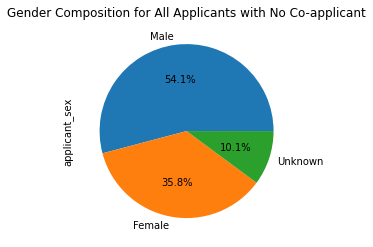

In [62]:
pie_helper(Nonco['applicant_sex'].replace(genderMap).value_counts(),image_path,
           'Gender_composition_for_all_applicants_no_co-applicant.png','Gender Composition for All Applicants with No Co-applicant')

<Figure size 432x288 with 0 Axes>

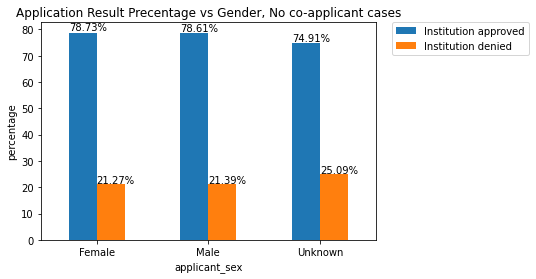

In [65]:
bar_helper(Nonco,image_path,
           'Application_result_percentage_vs_gender_no_co-applicant.png',
           'Application Result Precentage vs Gender, No co-applicant cases' , genderMap)

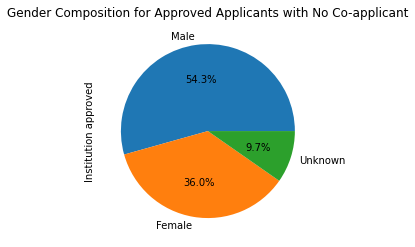

In [69]:
pie_helper(Noncopv['Institution approved'].reindex(index=['Male','Female','Unknown']),image_path,
           'Approved_applicants_gender_no_co-applicant.png','Gender Composition for Approved Applicants with No Co-applicant')

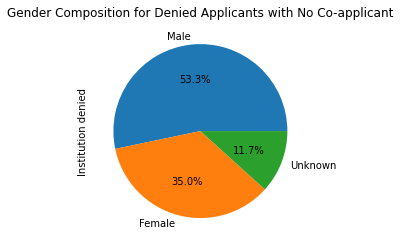

In [70]:
pie_helper(Noncopv['Institution denied'].reindex(index=['Male','Female','Unknown']),image_path,
           'Denied_applicants_gender_no_co-applicant.png','Gender Composition for Denied Applicants with No Co-applicant')

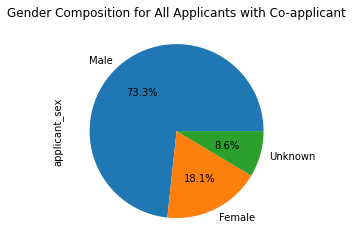

In [71]:
pie_helper(Coappli['applicant_sex'].replace(genderMap).value_counts(),image_path,
           'Gender_composition_for_all_applicants_co-applicant.png','Gender Composition for All Applicants with Co-applicant')

<Figure size 432x288 with 0 Axes>

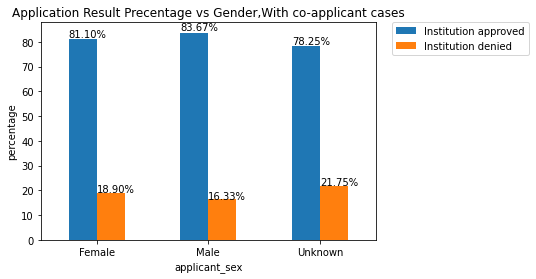

In [72]:
bar_helper(Coappli,image_path,
           'Application_result_percentage_vs_gender_co-applicant.png',
           'Application Result Precentage vs Gender,With co-applicant cases' , genderMap)

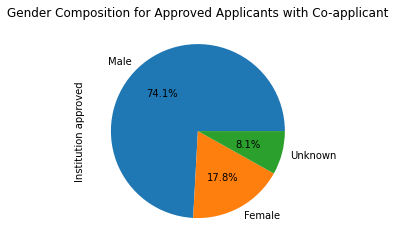

In [73]:
pie_helper(Coapplipv['Institution approved'].reindex(index=['Male','Female','Unknown']),image_path,
           'Approved_applicants_gender_co-applicant.png','Gender Composition for Approved Applicants with Co-applicant')

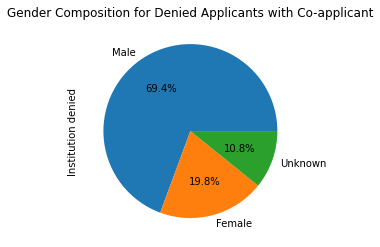

In [74]:
pie_helper(Coapplipv['Institution denied'].reindex(index=['Male','Female','Unknown']),image_path,
           'Denied_applicants_gender_co-applicant.png','Gender Composition for Denied Applicants with Co-applicant')

c.) Pair analysis

In [83]:
Cover=Coappli.copy()
Cover['Pair_Gender']=Cover['applicant_sex'].astype(str)+Cover['co_applicant_sex'].astype(str)

In [85]:
PairDict={'11':"Main:Male,Co:Male",'12':'Main:Male,Co:Female','13':'Main:Male,Co:Unknown','14':'Main:Male,Co:Unknown',
         '21':"Main:Female,Co:Male",'22':'Main:Female,Co:Female','23':'Main:Female,Co:Unknown','24':'Main:Female,Co:Unknown',
         '31':"Main:Unknown,Co:Male",'32':'Main:Unknown,Co:Female','33':'Main:Unknown,Co:Unknown','34':'Main:Unknown,Co:Unknown',
         '41':"Main:Unknown,Co:Male",'42':'Main:Unknown,Co:Female','43':'Main:Unknown,Co:Unknown','44':'Main:Unknown,Co:Unknown'}

In [86]:
Cover['Pair_Gender'].value_counts()

12    385999
21     84264
33     43417
11     19900
22     14941
13      6521
23      2599
32      1980
31       999
44       725
41       496
14       455
43       289
24       281
34       247
42       109
Name: Pair_Gender, dtype: int64

<Figure size 432x288 with 0 Axes>

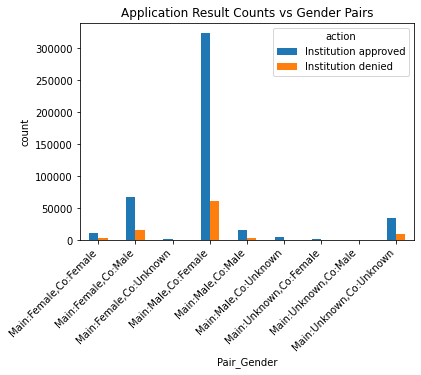

In [97]:
Sex_result_pair=Cover[['Pair_Gender','action_taken']]
RecodeAction={1:"Institution approved",2:"Institution approved", 3:'Institution denied', 7:'Institution denied',8:'Institution approved'}
Sex_result_b_pair=pd.DataFrame()
Sex_result_b_pair['action']= Sex_result_pair['action_taken'].replace(RecodeAction)
Sex_result_b_pair['Pair_Gender']=Sex_result_pair['Pair_Gender'].replace(PairDict)
Sex_result_a1_pair=Sex_result_b_pair.pivot_table(index='Pair_Gender', columns='action',aggfunc='size',fill_value=0)
plt.figure()
Sex_result_a1_pair.plot.bar(title='Application Result Counts vs Gender Pairs')
plt.ylabel('count')
plt.xticks(rotation=45,ha='right')
plt.savefig(image_path+'Application_result_count_gender_pair.png', bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

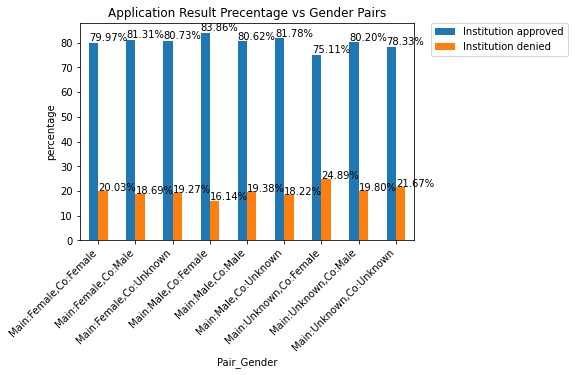

In [98]:
totalSA1_pair=Sex_result_a1_pair.sum(axis=1)
Sex_result_a2_pair=Sex_result_a1_pair.T
temp=Sex_result_a2_pair/totalSA1_pair.values
Sex_result_a2_pair=temp.T*100
plt.figure()
SA2B_pair=Sex_result_a2_pair.plot.bar(title='Application Result Precentage vs Gender Pairs')
for p in SA2B_pair.patches:
    SA2B_pair.annotate(str("%.2f"%p.get_height())+'%', xy=(p.get_x(), p.get_height()*1.01))
plt.xticks(rotation=45,ha='right')
plt.ylabel('percentage')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig(image_path+'Application_result_percentage_gender_pair.png', bbox_inches='tight')